In [8]:
from dollo_tree import TreeNode
import _delete as dl
import numpy as np
import seaborn as sns
import parsing_tree_gwick as pt
import pandas as pd
from inspect import signature

%load_ext autoreload

%autoreload 2

'''
tree_gw = "(a:1,(d:2,b:3,c:4),(e:1, f:2))"

tree1 = pt.loads(tree_gw)[0]

cn_max = 5
num_site = 8
leaf_cns = {}
tree1.count_leaves()

for node in tree1.nodes:
    leaf_cns[node.name] = np.random.randint(cn_max, size=num_site)
print(leaf_cns)
#leaf_cns = {"a":[1,2], "b":[2,4], "c":[3,6], "d":[4,8]}
#dl.calc_score_recursive(tree1, leaf_cns1, 1, 8)
#print(tree1.cn_score)
dl.calc_score_recursive_vect(tree1, leaf_cns, 1, cn_max, num_site)
print(tree1.cn_score)
print("number of leaf: %d" % tree1.num_leaves)
print("number of sites: %d" % num_site)
print("number of max copies: %d" % cn_max)

pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   columns=['a', 'b', 'c'])

#creating data frame
pd.DataFrame(tree1.cn_score.transpose(), columns = [str(i+1) for i in range(num_site)]).to_csv("parsimony.csv")

fname = "parsimony.csv"
#read data
df = pd.read_csv(fname)


df["copy_number"] = [i for i in range(cn_max + 1)]


#pd.melt(df, id_vars = ["copy_number"], value_vars = [str(i+1) for i in range(num_site)], var_name = "num_site", value_name = "parsimony_score")
#ps_score.rename(rows = [str(i) for i in range(cn_max)])
#pd.melt(df, [str(i+1) for i in range(num_site)], id_values, var_name, value_name )

min_score = df.melt(id_vars = ["copy_number"], value_vars = [str(i+1) for i in range(num_site)], 
        var_name = "bin_id", value_name = "parsimony_score")\
 .groupby("bin_id")\
 .agg({"parsimony_score":"min"})
min_score['bin_id'] = min_score.index
#type(min_score)
sns.catplot(x="bin_id", y="parsimony_score", jitter=False, data=min_score)
sns.barplot(x="bin_id", y="parsimony_score", data=min_score);

'''


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'\ntree_gw = "(a:1,(d:2,b:3,c:4),(e:1, f:2))"\n\ntree1 = pt.loads(tree_gw)[0]\n\ncn_max = 5\nnum_site = 8\nleaf_cns = {}\ntree1.count_leaves()\n\nfor node in tree1.nodes:\n    leaf_cns[node.name] = np.random.randint(cn_max, size=num_site)\nprint(leaf_cns)\n#leaf_cns = {"a":[1,2], "b":[2,4], "c":[3,6], "d":[4,8]}\n#dl.calc_score_recursive(tree1, leaf_cns1, 1, 8)\n#print(tree1.cn_score)\ndl.calc_score_recursive_vect(tree1, leaf_cns, 1, cn_max, num_site)\nprint(tree1.cn_score)\nprint("number of leaf: %d" % tree1.num_leaves)\nprint("number of sites: %d" % num_site)\nprint("number of max copies: %d" % cn_max)\n\npd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),\n                   columns=[\'a\', \'b\', \'c\'])\n\n#creating data frame\npd.DataFrame(tree1.cn_score.transpose(), columns = [str(i+1) for i in range(num_site)]).to_csv("parsimony.csv")\n\nfname = "parsimony.csv"\n#read data\ndf = pd.read_csv(fname)\n\n\ndf["copy_number"] = [i for i in range(cn_max + 1)]\n\n\n#pd.melt(df, i

In [4]:
def plot_parsimony(fname, cn_max, num_site, min=False):
    df = pd.read_csv(fname)
    df["copy_number"] = [i for i in range(cn_max + 1)]
    df = df.melt(id_vars = ["copy_number"], value_vars = [str(i+1) for i in range(num_site)], 
            var_name = "site_id", value_name = "parsimony_score")\

     
    min_score = df.groupby("site_id")\
                .agg({"parsimony_score":"min"})
    min_score['site'] = min_score.index
    #type(min_score)
    max_hue = max(df[df.parsimony_score != np.inf].parsimony_score)
    #print(df[df.parsimony_score != np.inf])
    panel = sns.cubehelix_palette(max_hue, start=2, rot=0, dark=0, light=.95, reverse=True)
    print("max",max_hue)
    if min:
        sns.barplot(x="site", y="parsimony_score", data=min_score);
    else:
        colors = ["#FF0B04", "#4374B3"]
        sns.set_palette(sns.color_palette(colors))
        sns.scatterplot(x="bin_id", y="copy_number", data=df, hue="parsimony_score")
   


plot_parsimony("parsimony.csv", cn_max, num_site, True)
plot_parsimony("parsimony.csv", cn_max, num_site)
    

NameError: name 'num_site' is not defined

(tree, fname, cn_max, num_bins, df=None, display=None, bins=None, chromosome=None)
---- Reading the tree : 2295_clone_tree.newick----
(((E,D), (F,G)),(A,(B,C)))
((E,D), (F,G))
(E,D)
E
D
 (F,G)
F
G
(A,(B,C))
A
(B,C)
B
C
---- Reading copy number data: 2295_padded_chrom_cn_clones.tsv ----
---- Calculating parsimony score: 2295_clone_tree ----
---- Visualizing the tree: 2295_clone_tree ----


ValueError: setting an array element with a sequence.

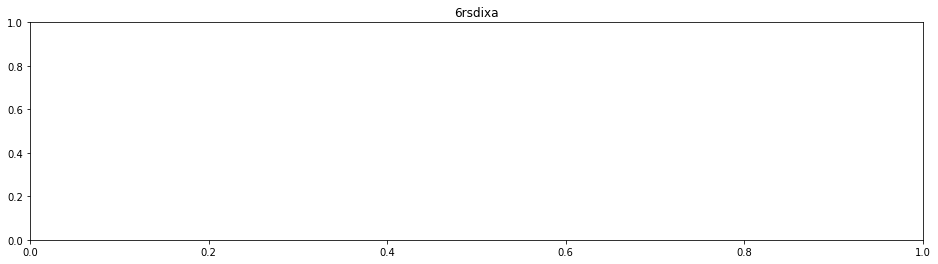

In [9]:
def read_csv(filename, nodes):
    df = pd.read_csv(filename, sep='\t', header=0)
    #data cleaning
    df = df.loc[df["start"] > 5000]
    leaf_cns = {}
    for node in nodes:
        leaf_cns[node] = df[node]
    num_bins = len(df.index)
    #returning the location data only
    df_location = df.drop(columns = nodes).copy()
    return df_location, leaf_cns, num_bins


def sankoff_parimony(tree_fname, cp_fname, 
                     segment_length, 
                     cn_max, bins,display = None,vis = False):
    #read the tree from newick format
    print("---- Reading the tree : %s.newick----" %tree_fname)
    tree = pt.read(tree_fname + ".newick")[0]
    nodes = [node.name for node in tree.leaves]
    
    #read the copy number data in specified file
    print("---- Reading copy number data: %s ----" %cp_fname)
    df_location, leaf_cns, num_bins = read_csv(cp_fname, nodes)
    
    #calculate the parsimony score
    print("---- Calculating parsimony score: %s ----" %tree_fname)
    dl.calc_score_recursive_vect(tree, leaf_cns, 
                                 segment_length, 
                                 cn_max, num_bins)
    tree.cn_backtrack = tree.children[0].cn_backtrack
    
    if vis:
        #visualize the tree
        print("---- Visualizing the tree: %s ----" %tree_fname)
        #pt.visualize_tree(tree, tree_fname, cn_max, num_bins, display, bins)
        pt.visualize_tree(tree, tree_fname, cn_max, num_bins, df_location , display, bins)
    
    #save the score of the root in a csv file:
    print("---- Saving the score: %s ----" %tree_fname)
    pd.DataFrame(tree.cn_score.transpose(), columns = [str(i+1) for i in range(num_bins)]).to_csv(tree_fname+ ".csv")
    
    
cp_fname = "2295_padded_chrom_cn_clones.tsv"
tree_name = "2295_clone_tree"
segment_length = 1
cn_max = 12
bins = [0,500,600,700,800]
display = "graph"

print(signature(pt.visualize_tree))
sankoff_parimony(tree_name, cp_fname, 
                     segment_length, 
                     cn_max, bins, 
                     display, vis = True)
    
        
    
    
        